<h1><center>Strutured Data project - DSOLFUTR</center></h1>
<center>**Mélanie FINAS - Antoine ISNARDY - Hamid JALALZAI - Alexandre SEVIN**</center>
<center>Master Data Science</center>

During this project, we tackled the problem of unconstrained text recognition. Here is a demonstration of our work.

## Data Download

First of all, you have to download the data available on this link:

http://www.iapr-tc11.org/dataset/ICDAR2003_RobustReading/TrialTrain/word.zip

Once you have extracted it, please enter the path of the data here :

In [1]:
training_directory = "/home/alex/Documents/strutured data/projet/train"

Please, change also this path into the file settings.py in the folder DSOLFUTR/utils/.

## From picture to array

Let's look at a picture:

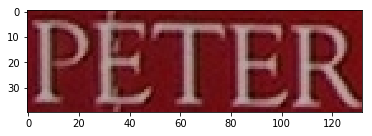

In [2]:
from matplotlib import pyplot as plt
from os.path import join as pjoin

img = plt.imread(pjoin(training_directory, "word", "2", "153.jpg"))
plt.imshow(img)
plt.show()

From this exemple, we have to predict "peter" from this picture. 

To do so, we first created a cnn as followed: 


<img src="Convolutionalpart.png" width="80%" height="80%">

Our cnn take as input a 32 * 32 pictures: we have to resize it and convert it into grayscale.

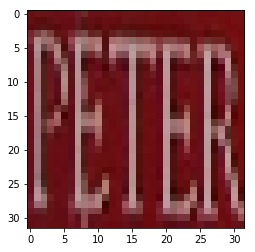

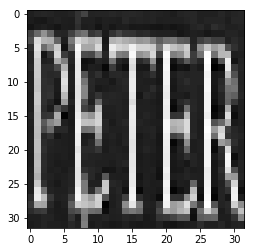

In [3]:
from skimage.transform import resize

img_reshaped = resize(image= img, output_shape=(32, 32, 3))
plt.imshow(img_reshaped)
plt.show()


from skimage.color import rgb2grey

img_preprocessed = rgb2grey(img_reshaped)
plt.imshow(img_preprocessed, cmap="gray")
plt.show()

Now, we can use our cnn to transform this picture into an array.

In [4]:
from DSOLFUTR.models import convolution_part

#Initialisation of the model
cnn = convolution_part.convolutional_part()

In [5]:
import tensorflow as tf

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    predicted = cnn.predict(x=img_preprocessed.reshape(1, 32, 32, 1), sess=sess)
    print("Shape of the prediction: ", predicted.shape)

Shape of the prediction:  (1, 4, 4, 256)


## From array to word

We can now apply our first classifier to get our final prediction.

In [6]:
from DSOLFUTR.models import model1

model = model1.first_model()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    final_prediction = model.predict(x=img_preprocessed.reshape(1, 32, 32, 1), sess=sess)
    print(final_prediction)

[[ 7 16 26  2 22 17  0 11 24 16  5 18 13 16  3 13 15  2  1 24 21 16  0]]


This is a prediction, but it isn't human friendly. Let's translate it.

In [7]:
from DSOLFUTR.utils import utils

utils.visualize(prediction=final_prediction, dict_inverse="abcdefghijklmnopqrstuvwxyz0123456789_")

['hq0cwralyqfsnqdnpcbyvqa']

This "word" is absolutely meaning less. In fact, our model hasn't been trained. Let's trained it ! And predict "Peter" again.

In [8]:
data_path = pjoin(training_directory, "word.csv")

data = utils.get_one_folder(1)

train_files, test_files, train_targets, test_targets = utils.preprocess_data(data, n_model=1)

with tf.Session() as sess:
    
    if True:
        sess.run(tf.global_variables_initializer())
        model.train(train_files, train_targets, sess, 10, False, "./", "./model_test_1.ckpt", test_files, test_targets)
    else:
        model.load_weights("./model_test_1.ckpt", sess=sess)
    
    final_prediction_1 = model.predict(x=img_preprocessed.reshape(1, 32, 32, 1), sess=sess)
    final_proba_1 = model.predict_proba(x=img_preprocessed.reshape(1, 32, 32, 1), sess=sess)
    
utils.visualize(prediction=final_prediction_1, dict_inverse="abcdefghijklmnopqrstuvwxyz0123456789_")

75 training pictures
25 testing pictures
Goal on the training set: 0.748985507246
Goal on the testing set: 0.758260869565
Initial accuracy: 0.0324637681159
Loss: 6212.80618286
17:24:44 Epoch: 1
Loss: 5868.11376953
17:25:20 Epoch: 2
Loss: 4251.54466248
17:25:55 Epoch: 3
Loss: 3496.32185936
17:26:30 Epoch: 4
Loss: 3501.08346963
17:27:06 Epoch: 5
Training accuracy: 0.663188405797
Validation accuracy: 0.678260869565
Model saved in file: ./model_test_1.ckpt
Loss: 3345.99197268
17:28:03 Epoch: 6
Loss: 3110.00612313
17:28:37 Epoch: 7
Loss: 2760.66600305
17:29:12 Epoch: 8
Loss: 2659.97138035
17:29:50 Epoch: 9
Loss: 2488.8239803
17:30:26 Epoch: 10
Training accuracy: 0.714202898551
Validation accuracy: 0.72
Model saved in file: ./model_test_1.ckpt


['cestm__________________']

We can see that our model can't read peter, but it understood that there is no character in the end ... probably because there is no word of 23 characters in the training set.

In order to have a efficient model, we have to train it longer. With 200 epochs, it completely fits the training set, but to have a higher validation score, we need to add more data. We will not do it in this notebook, because it takes to long.

Now, we can do the same with the second model, the N-grams models. 

In [9]:
from DSOLFUTR.models import model2

model_2 = model2.second_model()

train_files, test_files, train_targets, test_targets = utils.preprocess_data(data, n_model=2)

with tf.Session() as sess:
    
    if True:
        sess.run(tf.global_variables_initializer())
        model_2.train(train_files, train_targets, sess, 20, False, "./", "./model_test_2.ckpt", test_files, test_targets)
    else:
        model_2.load_weights("./model_test_2.ckpt", sess=sess)
        
    final_prediction_2 = model_2.predict(x=img_preprocessed.reshape(1, 32, 32, 1), sess=sess)
    final_proba_2 = model_2.predict_proba(x=img_preprocessed.reshape(1, 32, 32, 1), sess=sess)
    
print(sum(sum(final_prediction_2)))

75 training pictures
25 testing pictures
Goal on the training set: 0.992715654952
Goal on the testing set: 0.993397231097
Initial accuracy: 0.00728434504792
Loss: 19383.3
17:30:51 Epoch: 1
Loss: 19220.2
17:30:53 Epoch: 2
Loss: 19045.2
17:30:54 Epoch: 3
Loss: 18815.0
17:30:56 Epoch: 4
Loss: 18512.5
17:30:57 Epoch: 5
Training accuracy: 0.31190628328
Validation accuracy: 0.310947816826
Model saved in file: ./model_test_2.ckpt
Loss: 18101.9
17:31:10 Epoch: 6
Loss: 17562.9
17:31:11 Epoch: 7
Loss: 16852.0
17:31:13 Epoch: 8
Loss: 15916.6
17:31:14 Epoch: 9
Loss: 14716.9
17:31:16 Epoch: 10
Training accuracy: 0.95289314874
Validation accuracy: 0.953226837061
Model saved in file: ./model_test_2.ckpt
Loss: 13216.2
17:31:27 Epoch: 11
Loss: 11378.7
17:31:28 Epoch: 12
Loss: 9316.01
17:31:30 Epoch: 13
Loss: 7195.15
17:31:31 Epoch: 14
Loss: 5021.63
17:31:33 Epoch: 15
Training accuracy: 0.991650692226
Validation accuracy: 0.992097976571
Model saved in file: ./model_test_2.ckpt
Loss: 3226.51
17:31:43 Epo

This model is training faster, because it has only one classifier, instead of 23 for the first one. Moreover, the accuracy is way higher, but the model which predicts only 0 will have an accuracy of 0.99.

Here, "PETER" has only 18 n-grams, but our model predicts 0 As the previous exemple, our model learnt to predict 0 all the time in order to have a better accuracy. It needs more time to achieve to learn some useful information, and also more data. 

With these two models, we can combine the results in order to have better results. This is the role of the beamsearch:

In [10]:
from DSOLFUTR.utils import beamsearch
from DSOLFUTR.utils import ngrams

result = beamsearch.beam_search(final_proba_1[0], final_proba_2[0], 
                                "abcdefghijklmnopqrstuvwxyz0123456789_", 
                                ngrams.get_dict_ngrams(ngrams.get_ngrams()), 
                                utils.create_conversion_model1())

print(result)

e_e___s________________


Here, it is a little better. In fact, combining the two models leads to delete some wrong character from the model 1 prediction !

## To go further

Here we have only presented models trained on 1 folder of ICDAR. However, this model works perfectly with all data from ICDAR.

To play with a resnet, the models are DSOLFUTR/models/model1_resnet.py and DSOLFUTR/models/model2_resnet.py. It requieres to launch DSOLFUTR/utils/cnn_preprocessing_initdata.py to compute the representations of all pictures. Then, the syntax is the same, except that you must pass files_name to the train function of the models.

To play with MJSynth data, you must download them at http://www.robots.ox.ac.uk/~vgg/data/text/, extract them and compute the representations with the script DSOLFUTR/utils/cnn_preprocessing_ocford_batch. The models to treat these data are DSOLFUTR/models/model1_resnet_ox.py and DSOLFUTR/models/model2_resnet_ox.py. To train these models, you must enter a list of number corresponding to the number of the batch you want to train on.

An exemple of this last syntax is presented in the file main.py.